# AIT Development notebook

## notebook of structure

| #  | Name                                               | cells | for_dev | edit               | description                                                                |
|----|----------------------------------------------------|-------|---------|--------------------|----------------------------------------------------------------------------|
| 1  | [Environment detection](##1-Environment-detection) | 1     | No      | uneditable         | detect whether the notebook are invoked for packaging or in production     |
| 2  | [Preparing AIT SDK](##2-Preparing-AIT-SDK)         | 1     | Yes     | uneditable         | download and install AIT SDK                                               |
| 3  | [Dependency Management](##3-Dependency-Management) | 3     | Yes     | required(cell #2)  | generate requirements.txt for Docker container                             |
| 4  | [Importing Libraries](##4-Importing-Libraries)     | 2     | Yes     | required(cell #1)  | import required libraries                                                  |
| 5  | [Manifest Generation](##5-Manifest-Generation)     | 1     | Yes     | required           | generate AIT Manifest                                                      |
| 6  | [Prepare for the Input](##6-Prepare-for-the-Input) | 1     | Yes     | required           | generate AIT Input JSON (inventory mapper)                                 |
| 7  | [Initialization](##7-Initialization)               | 1     | No      | uneditable         | initialization for AIT execution                                           |
| 8  | [Function definitions](##8-Function-definitions)   | N     | No      | required           | define functions invoked from Main area.<br> also define output functions. |
| 9  | [Main Algorithms](##9-Main-Algorithms)             | 1     | No      | required           | area for main algorithms of an AIT                                         |
| 10 | [Entry point](##10-Entry-point)                    | 1     | No      | uneditable         | an entry point where Qunomon invoke this AIT from here                     |
| 11 | [License](##11-License)                            | 1     | Yes     | required           | generate license information                                               |
| 12 | [Deployment](##12-Deployment)                      | 1     | Yes     | uneditable         | convert this notebook to the python file for packaging purpose             |

## notebook template revision history

1.0.1 2020/10/21

* add revision history
* separate `create requirements and pip install` editable and noeditable
* separate `import` editable and noeditable

1.0.0 2020/10/12

* new cerarion

## body

### #1 Environment detection

[uneditable]

In [1]:
# Determine whether to start AIT or jupyter by startup argument
import sys
is_ait_launch = (len(sys.argv) == 2)

### #2 Preparing AIT SDK

[uneditable]

In [2]:
if not is_ait_launch:
    # get ait-sdk file name
    from pathlib import Path
    from glob import glob
    import re
    import os

    current_dir = %pwd

    ait_sdk_path = "./ait_sdk-*-py3-none-any.whl"
    ait_sdk_list = glob(ait_sdk_path)
    ait_sdk_name = os.path.basename(ait_sdk_list[-1])

    # install ait-sdk
    !pip install -q --upgrade pip
    !pip install -q --force-reinstall ./$ait_sdk_name

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jupyter-server 2.8.0 requires nbformat>=5.3.0, but you have nbformat 5.2.0 which is incompatible.
notebook 6.5.6 requires jupyter-client<8,>=5.3.4, but you have jupyter-client 8.6.0 which is incompatible.
notebook 6.5.6 requires pyzmq<25,>=17, but you have pyzmq 25.1.1 which is incompatible.


### #3 Dependency Management

#### #3-1 [uneditable]

In [3]:
if not is_ait_launch:
    from ait_sdk.common.files.ait_requirements_generator import AITRequirementsGenerator
    requirements_generator = AITRequirementsGenerator()

#### #3-2 [required]

In [4]:
if not is_ait_launch:
## sample ##
#     requirements_generator.add_package('pandas')
#     requirements_generator.add_package('seaborn')
    requirements_generator.add_package('pandas','2.0.3')
    requirements_generator.add_package('japanize_matplotlib','1.1.3')
    requirements_generator.add_package('scikit-learn','1.3.2')

#### #3-3 [uneditable]

In [5]:
if not is_ait_launch:
    requirements_generator.add_package(f'./{ait_sdk_name}')
    requirements_path = requirements_generator.create_requirements(current_dir)

    !pip install -q -r $requirements_path 

### #4 Importing Libraries

#### #4-1 [required]

In [6]:
# import if you need modules cell

## sample ##
# import pandas as pd
# import seaborn as sn
# import matplotlib.pyplot as plt
# from pathlib import Path
# from os import path

## modified by KOIKE on 2023.11.28
# !apt update > /dev/null 2>&1
# !apt upgrade -y > /dev/null 2>&1
# !apt install -y libglib2.0-0 > /dev/null 2>&1
# !pip install pandas japanize_matplotlib scikit-learn > /dev/null 2>&1

In [7]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
from scipy.cluster.hierarchy import dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering

#### #4-2 [uneditable]

In [8]:
# must use modules
from os import path
import shutil  # do not remove
from ait_sdk.common.files.ait_input import AITInput  # do not remove
from ait_sdk.common.files.ait_output import AITOutput  # do not remove
from ait_sdk.common.files.ait_manifest import AITManifest  # do not remove
from ait_sdk.develop.ait_path_helper import AITPathHelper  # do not remove
from ait_sdk.utils.logging import get_logger, log, get_log_path  # do not remove
from ait_sdk.develop.annotation import measures, resources, downloads, ait_main  # do not remove
# must use modules

### #5 Manifest Generation

[required]

In [9]:
if not is_ait_launch:
## sample ##
#     from ait_sdk.common.files.ait_manifest_generator import AITManifestGenerator
#     manifest_genenerator = AITManifestGenerator(current_dir)
#     manifest_genenerator.set_ait_name('dev_ait_template_for_aithub')
#     manifest_genenerator.set_ait_description('AIT開発テンプレート')
#     manifest_genenerator.set_ait_source_repository('https://github.com/aistairc/qunomon/tree/main/ait_repository/ait/dev_ait_template_for_aithub')
#     manifest_genenerator.set_ait_version('0.2')
#     manifest_genenerator.add_ait_keywords('AIT')
#     manifest_genenerator.add_ait_keywords('Template')
#     manifest_genenerator.set_ait_description('AIT template (docker image regist to remote)')
#     manifest_genenerator.set_ait_source_repository('https://hub.docker.com/r/qunomon/dev_template_remote_docker')
#     manifest_genenerator.set_ait_version('0.1')
#     manifest_genenerator.set_ait_quality('https://back-web.aithub.io/ait-hub/api/0.0.1/qualityDimensions/AIQM_Guideline/Coverage_for_distinguished_problem_cases')
#     inventory_requirement_iris_data = manifest_genenerator.format_ait_inventory_requirement(format_=['csv'])
#     manifest_genenerator.add_ait_inventories(name='iris_data', 
#                                              type_='dataset', 
#                                              description='アヤメの分類データです', 
#                                              requirement=inventory_requirement_iris_data)
#     manifest_genenerator.add_ait_parameters(name='mean_column_name', 
#                                             type_='str', 
#                                             description='sepal.width\nsepal.length\npetal.width\npetal.length', 
#                                             default_val='sepal.width')
#     manifest_genenerator.add_ait_measures(name='mean', 
#                                           type_='float', 
#                                           description='mean of select column', 
#                                           structure='single',
#                                           min='0')
#     manifest_genenerator.add_ait_resources(name='pairplot', 
#                                            type_='picture', 
#                                            description='pairplot')
#     manifest_genenerator.add_ait_downloads(name='Log', 
#                                            description='AIT実行ログ')
#     manifest_path = manifest_genenerator.write()


    from ait_sdk.common.files.ait_manifest_generator import AITManifestGenerator
    manifest_genenerator = AITManifestGenerator(current_dir)
    manifest_genenerator.set_ait_name('eval_k49_0.1')
    manifest_genenerator.set_ait_description('K49データセットの変体仮名ラベリング')
    manifest_genenerator.add_ait_keywords('AIT')
    manifest_genenerator.add_ait_keywords('K49')
    manifest_genenerator.set_ait_description('AIT template (docker image regist to remote)')
    manifest_genenerator.set_ait_version('0.1')
    inventory_requirement_k49_train_imgs = manifest_genenerator.format_ait_inventory_requirement(format_=['npz'])
    inventory_requirement_k49_train_labels = manifest_genenerator.format_ait_inventory_requirement(format_=['npz'])
    inventory_requirement_k49_classmap = manifest_genenerator.format_ait_inventory_requirement(format_=['csv'])

    manifest_genenerator.add_ait_inventories(name='k49-train-imgs', 
                                             type_='dataset', 
                                             description='かな文字画像', 
                                             requirement=inventory_requirement_k49_train_imgs)
    manifest_genenerator.add_ait_inventories(name='k49-train-labels', 
                                             type_='dataset', 
                                             description='かな文字ラベル', 
                                             requirement=inventory_requirement_k49_train_labels)
    manifest_genenerator.add_ait_inventories(name='k49_classmap', 
                                             type_='dataset', 
                                             description='かな文字ラベルマスタ', 
                                             requirement=inventory_requirement_k49_classmap)
    manifest_genenerator.add_ait_resources(name='example_images',
                                           type_='picture', 
                                           description='plot_sample')
    manifest_genenerator.add_ait_resources(name='example_images_char', 
                                           type_='picture', 
                                           description='plot_sample')
    manifest_genenerator.add_ait_resources(name='hierarchical_clustering', 
                                           type_='picture', 
                                           description='plot_sample')
    manifest_genenerator.add_ait_resources(name='hierarchical_clustering_examples', 
                                           type_='picture', 
                                           description='plot_sample')
    manifest_genenerator.add_ait_resources(name='hierarchical_clustering_pie', 
                                           type_='picture', 
                                           description='plot_sample')
    manifest_genenerator.add_ait_downloads(name='Log', 
                                           description='AIT実行ログ')
    manifest_path = manifest_genenerator.write()

### #6 Prepare for the Input

[required]

In [10]:
if not is_ait_launch:
## sample ##
#     from ait_sdk.common.files.ait_input_generator import AITInputGenerator
#     input_generator = AITInputGenerator(manifest_path)
#     input_generator.add_ait_inventories(name='iris_data',
#                                         value='iris_data/tableconvert_csv_4nryby.csv')
#     input_generator.set_ait_params(name='mean_column_name',
#                                    value='petal.width')
#     input_generator.write()

    from ait_sdk.common.files.ait_input_generator import AITInputGenerator
    input_generator = AITInputGenerator(manifest_path)
    input_generator.add_ait_inventories(name='k49-train-imgs',
                                        value='input/k49-train-imgs.npz')
    input_generator.add_ait_inventories(name='k49-train-labels',
                                        value='input/k49-train-labels.npz')
    input_generator.add_ait_inventories(name='k49_classmap',
                                        value='input/k49_classmap.csv')
    input_generator.write()


### #7 Initialization

[uneditable]

In [11]:
logger = get_logger()

ait_manifest = AITManifest()
ait_input = AITInput(ait_manifest)
ait_output = AITOutput(ait_manifest)

if is_ait_launch:
    # launch from AIT
    current_dir = path.dirname(path.abspath(__file__))
    path_helper = AITPathHelper(argv=sys.argv, ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)
else:
    # launch from jupyter notebook
    # ait.input.json make in input_dir
    input_dir = '/usr/local/qai/mnt/ip/job_args/1/1'
    current_dir = %pwd
    path_helper = AITPathHelper(argv=['', input_dir], ait_input=ait_input, ait_manifest=ait_manifest, entry_point_dir=current_dir)

ait_input.read_json(path_helper.get_input_file_path())
ait_manifest.read_json(path_helper.get_manifest_file_path())

### do not edit cell

### #8 Function definitions

[required]

In [12]:
## sample ##
# @log(logger)
# @measures(ait_output, 'mean')
# def calc_mean(iris_data, col_name):
#     return iris_data[col_name].mean()
@log(logger)
@resources(ait_output, path_helper, 'example_images', 'example_images')
def plot_samples(train_images, train_labels, classmap, file_path = None):
    image_size_x, image_size_y = train_images.shape[1], train_images.shape[2]
    ### visualize examples
    X, Y = np.meshgrid(range(image_size_x), range(image_size_y)[::-1])
    fig, ax = plt.subplots(5, 10, figsize=(20, 10))
    for ij in range(50):
        i = ij // 10
        j = ij % 10
        img = ax[i, j].pcolormesh(X, Y, train_images[ij], cmap='gray', label=classmap.loc[train_labels[ij], 'char'])
        ax[i, j].axis(False)
    fig.savefig(f'{file_path}.png', bbox_inches='tight', transparent=True)

@log(logger)
@resources(ait_output, path_helper, 'example_images_char', 'example_images_char')
def plot_samples_char(train_images, train_labels, classmap, file_path = None, char='ま'):
    image_size_x, image_size_y = train_images.shape[1], train_images.shape[2]
    X, Y = np.meshgrid(range(image_size_x), range(image_size_y)[::-1])
    ### visualize examples ("ま" only if default value)
    ### いくつかは「ま」ではなく「満」,「万」や「馬」など
    train_images_ = train_images[classmap.loc[train_labels, 'char']==char]
    fig, ax = plt.subplots(5, 10, figsize=(20, 10))
    for ij in range(50):
        i = ij // 10
        j = ij % 10
        img = ax[i, j].pcolormesh(X, Y, train_images_[ij], cmap='gray')
        ax[i, j].axis(False)
    fig.savefig(f'{file_path}_{char}.png', bbox_inches='tight', transparent=True)

In [13]:
## sample ##
# @log(logger)
# @resources(ait_output, path_helper, 'pairplot', 'pairplot.png')
# def save_pair_plot(iris_data, file_path: str=None) -> str:    
#     sn.pairplot(iris_data, hue='variety')
#     plt.savefig(file_path)
@log(logger)
@resources(ait_output, path_helper, 'hierarchical_clustering', 'hierarchical_clustering')
def plot_hierarchical_clustering(train_images, train_labels, classmap, file_path = None, char = 'ま', n_clusters = 4):
    
    def plot_dendrogram(model, ax, **kwargs):
        counts = np.zeros(model.children_.shape[0])
        n_samples = len(model.labels_)
        for i, merge in enumerate(model.children_):
            current_count = 0
            for child_idx in merge:
                if child_idx < n_samples:
                    current_count += 1  
                else:
                    current_count += counts[child_idx - n_samples]
            counts[i] = current_count
        linkage_matrix = np.column_stack(
            [model.children_, model.distances_, counts]
        ).astype(float)
        R = dendrogram(linkage_matrix, ax=ax,  **kwargs)
        return linkage_matrix, R

    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')

    x_train, y_train = train_images, train_labels
    x = x_train[classmap.loc[y_train, 'char']==char]
    X = x.reshape(x.shape[0], x.shape[1] * x.shape[2])
    model_ = model.fit(X)
    fig, ax = plt.subplots(figsize=(20, 10))
    fig.suptitle(f"Hierarchical Clustering Dendrogram of 「{char}」")
    linkage_matrix, R = plot_dendrogram(model_, ax, truncate_mode='level', p=3)
    ax.set_xlabel('Number of points in node (or index of point if no parenthesis).')
    fig.savefig(f"{file_path}.png")

    clustering_result = fcluster(linkage_matrix, t=n_clusters, criterion='maxclust')

    hierarchical_clustering_examples(train_images, train_labels, classmap, char='ま', n_clusters=4, c_result=clustering_result, x_for_examples=x)
    hierarchical_clustering_pie(train_images, train_labels, classmap, char='ま', n_clusters=4, c_result=clustering_result, x_for_pie=x)

@log(logger)
@resources(ait_output, path_helper, 'hierarchical_clustering_examples', 'hierarchical_clustering_examples')
def hierarchical_clustering_examples(train_images, train_labels, classmap, file_path = None, char = 'ま', n_clusters = 4, c_result = None, x_for_examples = None):

    image_size_x, image_size_y = train_images.shape[1], train_images.shape[2]
    X, Y = np.meshgrid(range(image_size_x), range(image_size_y)[::-1])
    fig, ax = plt.subplots(2, n_clusters, figsize=(n_clusters * 3, 2 * 3))
    for ij, cluster in enumerate(np.unique(c_result)):  
        cluster_data = x_for_examples[c_result==cluster]
        j = ij
        ax[0, j].pcolormesh(X, Y, cluster_data[ij], cmap='gray', label=f'Cluster {cluster}')
        ax[1, j].pcolormesh(X, Y, cluster_data[ij+1], cmap='gray')
        ax[0, j].axis(False)
        ax[1, j].axis(False)
    fig.savefig(f"{file_path}.png")

@log(logger)
@resources(ait_output, path_helper, 'hierarchical_clustering_pie', 'hierarchical_clustering_pie')
def hierarchical_clustering_pie(train_images, train_labels, classmap, file_path = None, char = 'ま', n_clusters = 4, c_result = None, x_for_pie = None):

    image_size_x, image_size_y = train_images.shape[1], train_images.shape[2]
    X, Y = np.meshgrid(range(image_size_x), range(image_size_y)[::-1])
    labels, count = np.unique(c_result, return_counts=True)
    fig, ax = plt.subplots()
    wedge, text, pct = ax.pie(count, labels=labels, autopct='%1.0f%%')
    for id, cluster in enumerate(labels):
        cluster_data = x_for_pie[c_result==cluster]
        xyins = np.array(text[id].get_position())
        axins = ax.inset_axes([xyins[0]+0.05, xyins[1]+0.05, 0.3, 0.3], transform=ax.transData)
        axins.pcolormesh(X, Y, cluster_data[0], cmap='gray')
        axins.axis(False)
    fig.savefig(f"{file_path}.png")
    

In [14]:
## sample ##
@log(logger)
@downloads(ait_output, path_helper, 'Log', 'ait.log')
def move_log(file_path: str=None) -> str:
    shutil.move(get_log_path(), file_path)

### #9 Main Algorithms

[required]

In [15]:
@log(logger)
@ait_main(ait_output, path_helper)
def main() -> None:
## sample ##
    # インベントリを読み込み
#     iris_data = pd.read_csv(ait_input.get_inventory_path('iris_data'))
    train_images = np.load(ait_input.get_inventory_path('k49-train-imgs'))['arr_0']
    train_labels = np.load(ait_input.get_inventory_path('k49-train-labels'))['arr_0']
    classmap = pd.read_csv(ait_input.get_inventory_path('k49_classmap'))
    
    plot_samples(train_images, train_labels, classmap)
    plot_samples_char(train_images, train_labels, classmap, char='ま')
    plot_hierarchical_clustering(train_images, train_labels, classmap, char='ま', n_clusters=4)
#     calc_mean(iris_data, ait_input.get_method_param_value('mean_column_name'))
#     save_pair_plot(iris_data)
    move_log()
    

### #10 Entry point

[uneditable]

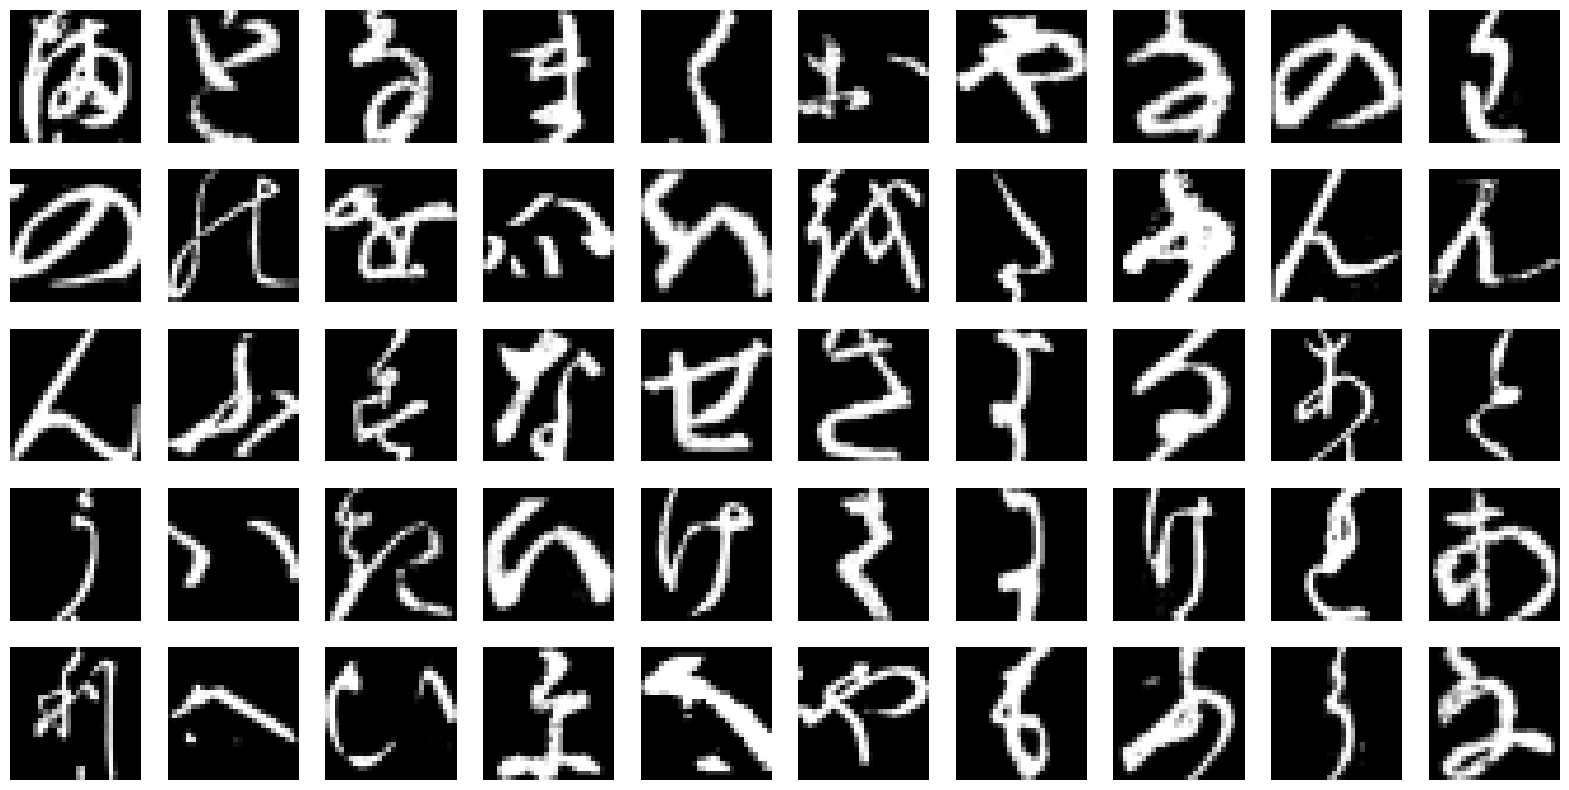

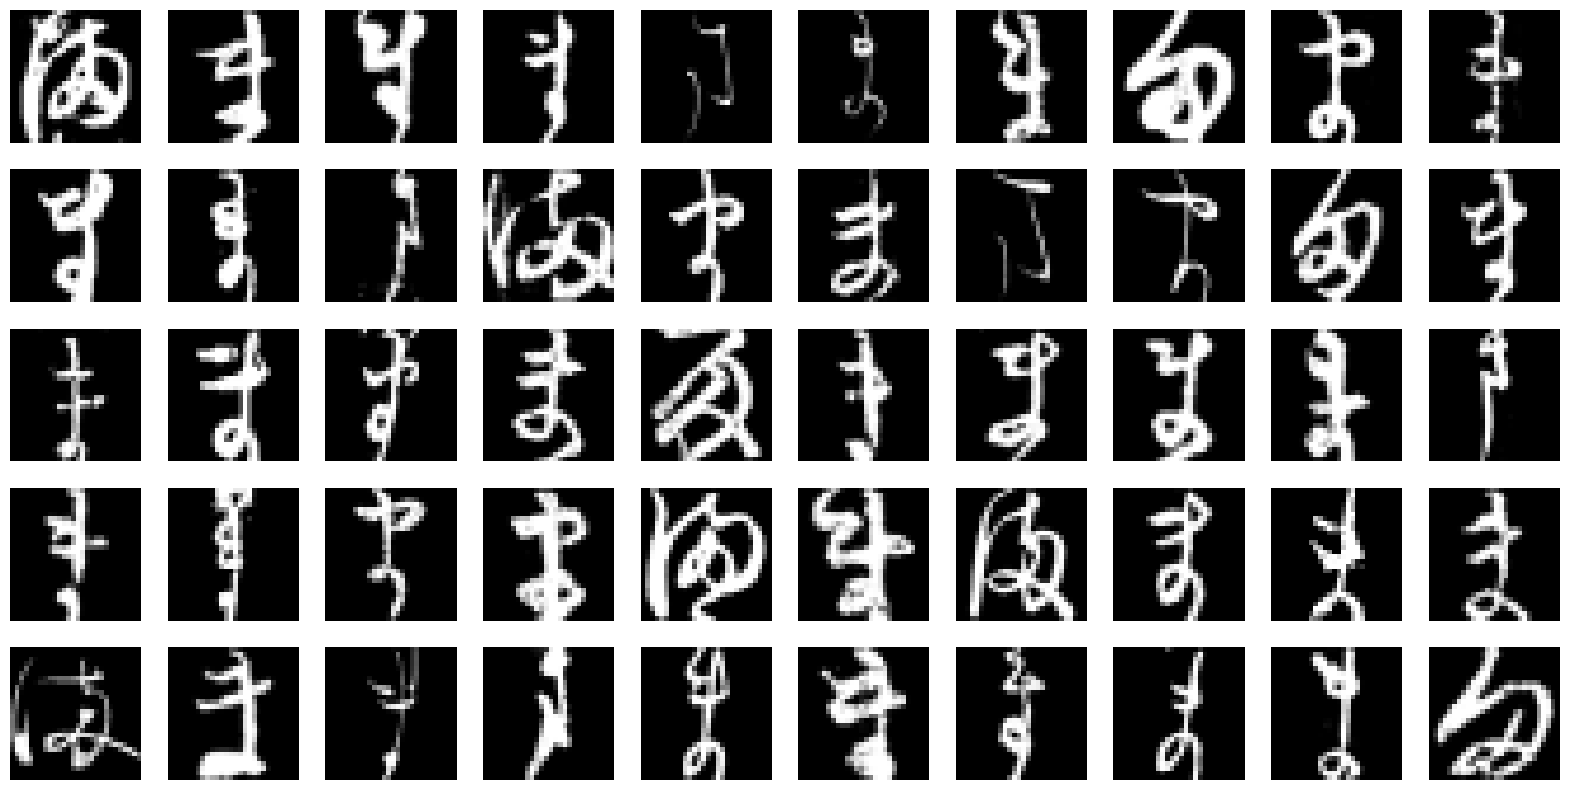

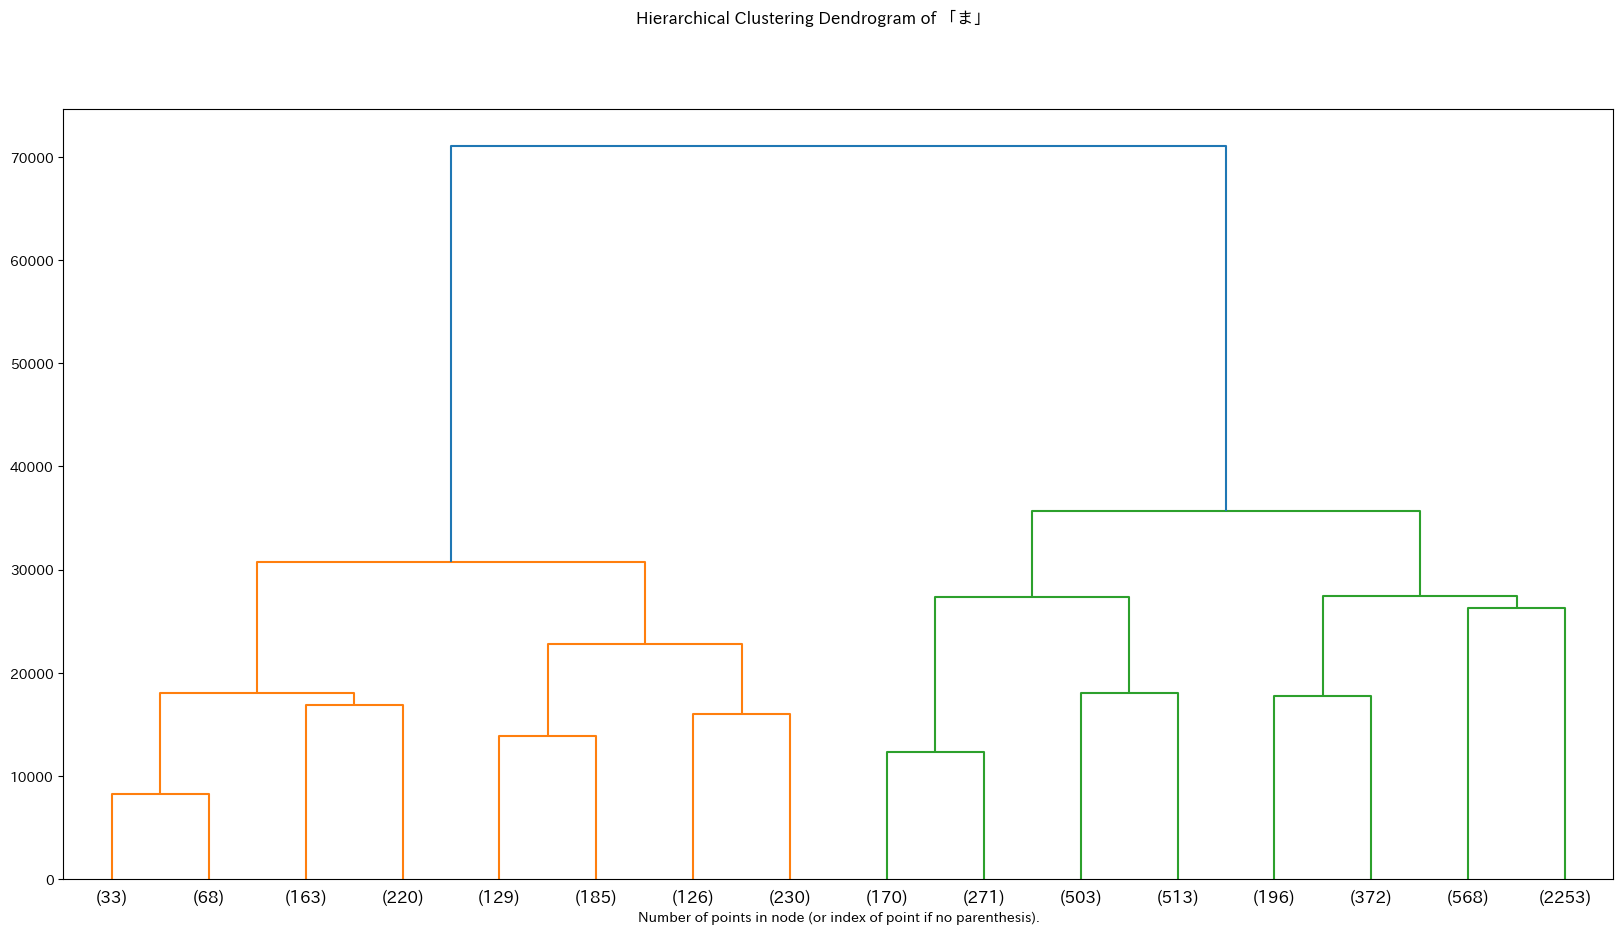

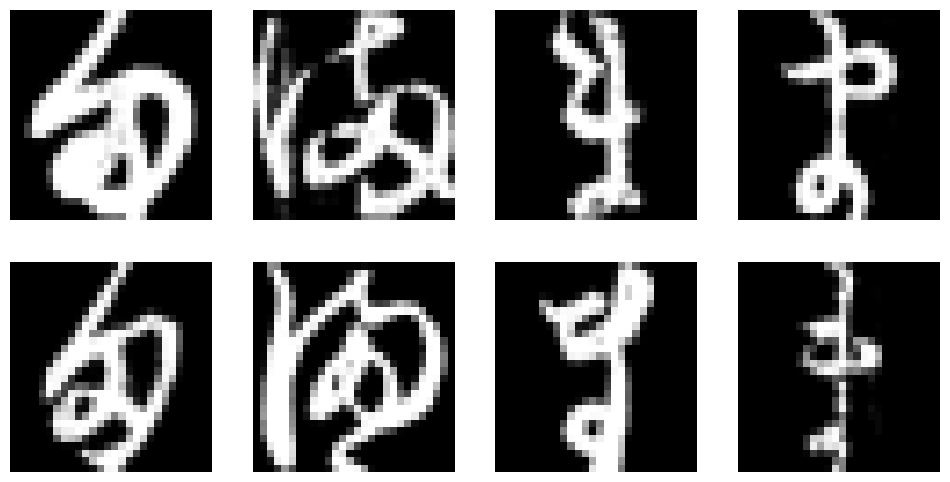

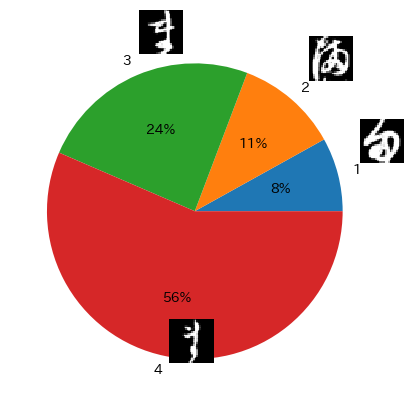

In [16]:
if __name__ == '__main__':
    main()

### #11 License

[required]

In [17]:
## sample ##
ait_owner='AIST'
ait_creation_year='2023'

### #12 Deployment

[uneditable] 

In [18]:
if not is_ait_launch:
    from ait_sdk.deploy import prepare_deploy
    from ait_sdk.license.license_generator import LicenseGenerator
    
    current_dir = %pwd
    prepare_deploy(ait_sdk_name, current_dir, requirements_path)
    
    # output License.txt
    license_generator = LicenseGenerator()
    license_generator.write('../top_dir/LICENSE.txt', ait_creation_year, ait_owner)
